# Spotify Data Analysis

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
df = pd.read_csv("C:/Users/Amaan/OneDrive/Documents/csv data/Spotify Data.csv")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [17]:
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [18]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   valence           170653 non-null  float64       
 1   year              170653 non-null  int64         
 2   acousticness      170653 non-null  float64       
 3   artists           170653 non-null  object        
 4   danceability      170653 non-null  float64       
 5   duration_ms       170653 non-null  int64         
 6   energy            170653 non-null  float64       
 7   explicit          170653 non-null  int64         
 8   id                170653 non-null  object        
 9   instrumentalness  170653 non-null  float64       
 10  key               170653 non-null  int64         
 11  liveness          170653 non-null  float64       
 12  loudness          170653 non-null  float64       
 13  mode              170653 non-null  int64         
 14  name

### Cleaning Data

In [19]:
df.drop_duplicates(inplace=True)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna("Unknown")

In [20]:
df.drop(columns=['instrumentalness', 'liveness', 'speechiness', 'id', 'key'], inplace= True)

### Feature Distributions

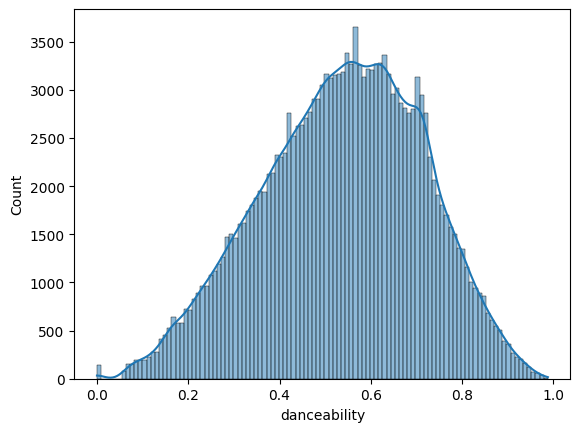

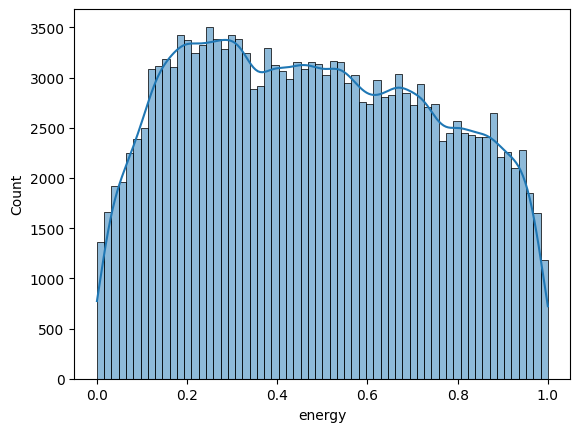

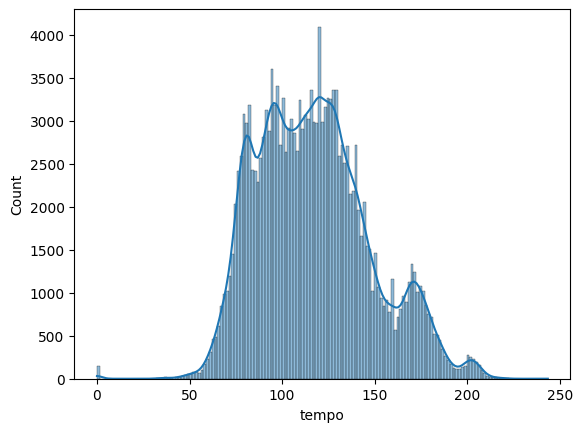

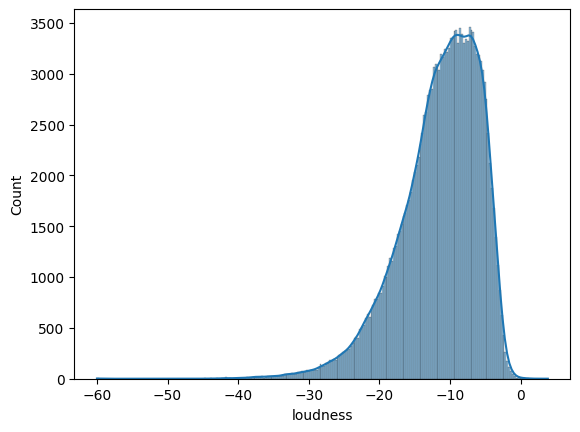

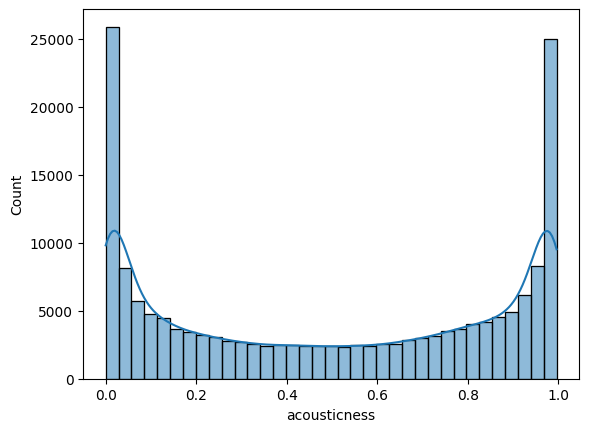

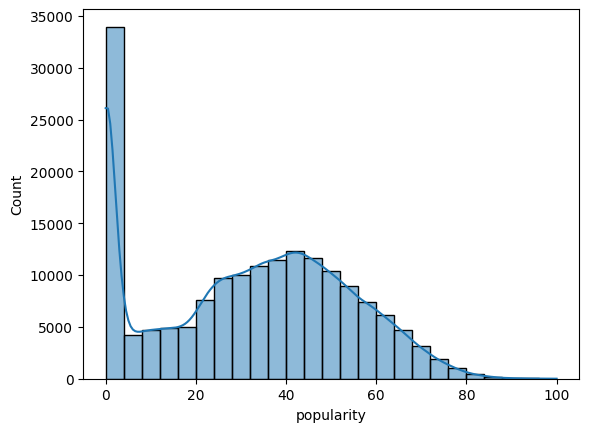

In [ ]:
sns.histplot(df['danceability'], kde=True); plt.show()

sns.histplot(df['energy'], kde=True); plt.show()
sns.histplot(df['tempo'], kde=True); plt.show()
sns.histplot(df['loudness'], kde=True); plt.show()
sns.histplot(df['acousticness'], kde=True); plt.show()
sns.histplot(df['popularity'], bins=25, kde=True); plt.show()


### Correlation Between Features

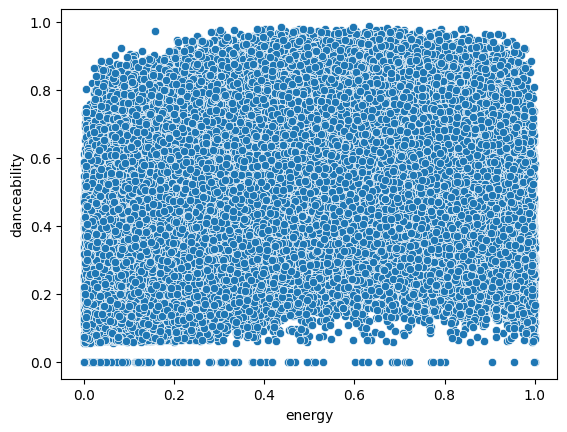

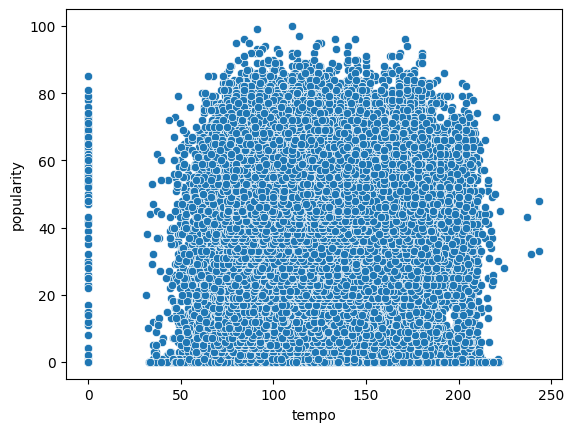

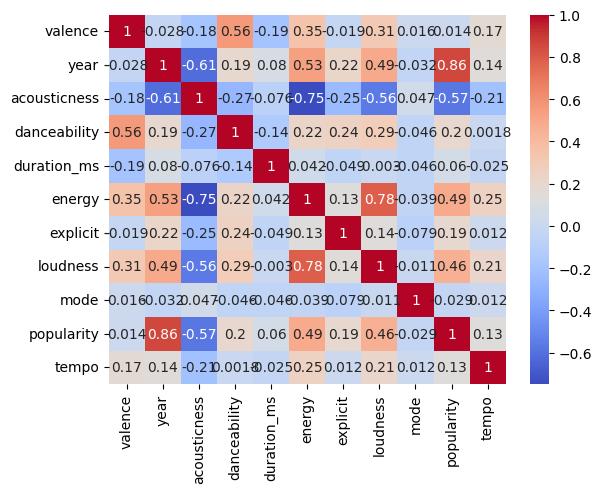

In [22]:
sns.scatterplot(x=df['energy'], y=df['danceability']); plt.show()
sns.scatterplot(x=df['tempo'], y=df['popularity']); plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### Trends Over Time

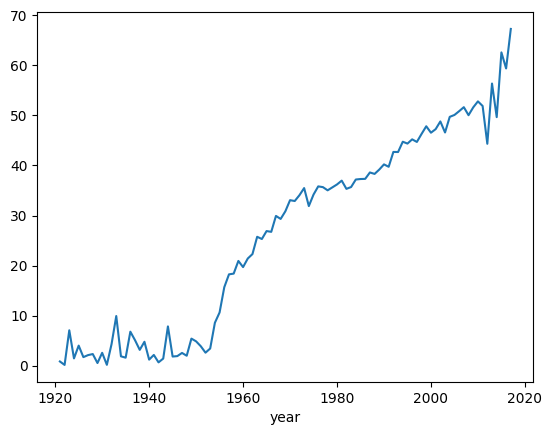

In [23]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

df['year'] = df['release_date'].dt.year
df.groupby('year')['popularity'].mean().plot()
plt.show()

### Data Visualization

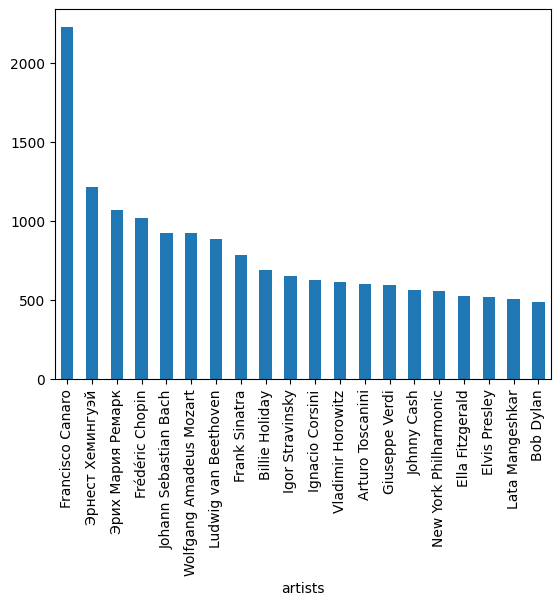

In [24]:
# Artist Analysis
df['artists'] = df['artists'].str.strip('[]').str.replace("'", '').str.split(', ')
df_exp = df.explode('artists')
df_exp['artists'].value_counts().head(20).plot(kind='bar')
plt.show()

In [25]:
# Top Tracks
df.sort_values('popularity', ascending=False).head(20)[['name','artists','popularity']]


,name,artists,popularity
19611,Dakiti,"[Bad Bunny, Jhay Cortez]",100
19606,Mood (feat. iann dior),"[24kGoldn, iann dior]",99
19618,Dynamite,[BTS],97
19616,Blinding Lights,[The Weeknd],96
19608,WAP (feat. Megan Thee Stallion),"[Cardi B, Megan Thee Stallion]",96
19610,positions,[Ariana Grande],96
19612,What You Know Bout Love,[Pop Smoke],96
19615,Holy (feat. Chance The Rapper),"[Justin Bieber, Chance the Rapper]",95
19607,For The Night (feat. Lil Baby & DaBaby),"[Pop Smoke, Lil Baby, DaBaby]",95
19623,you broke me first,[Tate McRae],95


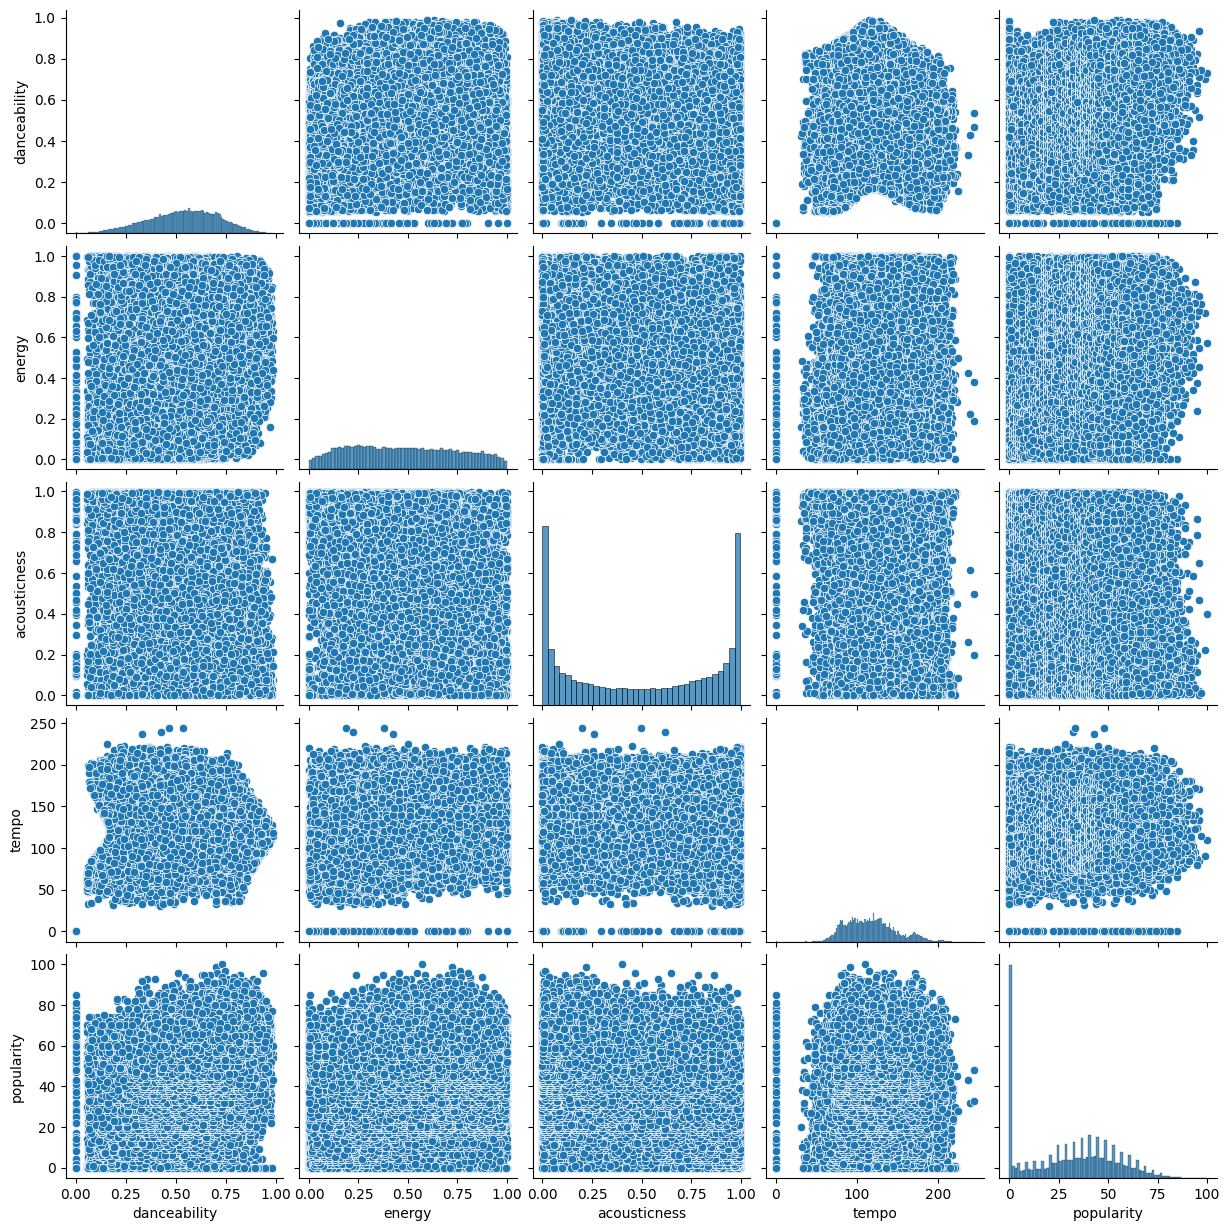

In [26]:
# Pairplot
sns.pairplot(df[["danceability","energy","acousticness","tempo","popularity"]]); plt.show()


### Modeling and Predictions 

In [27]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,loudness,mode,name,popularity,release_date,tempo
0,0.0594,1921.0,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921-01-01,80.954
1,0.9630,1921.0,0.732,[Dennis Day],0.819,180533,0.341,0,-12.441,1,Clancy Lowered the Boom,5,1921-01-01,60.936
2,0.0394,1921.0,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,-14.850,1,Gati Bali,5,1921-01-01,110.339
3,0.1650,1921.0,0.967,[Frank Parker],0.275,210000,0.309,0,-9.316,1,Danny Boy,3,1921-01-01,100.109
4,0.2530,1921.0,0.957,[Phil Regan],0.418,166693,0.193,0,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,101.665


In [28]:
# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

numeric_features = ["danceability", "energy", "tempo", "loudness", "acousticness", "duration_ms"]

scl = StandardScaler()
num_df = scl.fit_transform(df[numeric_features])
num_df = pd.DataFrame(num_df, columns=numeric_features)

le = LabelEncoder()
cat_df = le.fit_transform(df["artists"].astype(str))
cat_df = pd.DataFrame(cat_df, columns=["artists"])

concated_df = pd.concat([num_df, cat_df], axis=1)

X = concated_df
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, lr_pred)*100)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, dt_pred)*100)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random forest R2 Score:", r2_score(y_test, rf_pred)*100) 

Linear Regression R2 Score: 36.254831560179376
Decision Tree R2 Score: 14.344401518120664
Random forest R2 Score: 56.99194321428943


### Tuning Models for Better Performance

In [42]:
# Tuning Decision Tree
param_grid = {
    'max_depth': [3, 5, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
best_dt_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Tuned Decision Tree R2:", r2_score(y_test, best_dt_pred)*100)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}
Tuned Decision Tree R2: 51.51543710048696


### Evaluation

In [43]:
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Random forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_pred))
print("Tuned Decision Tree MAE:", mean_absolute_error(y_test, best_dt_pred))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Random forest RMSE:", np.sqrt(mean_absolute_error(y_test, rf_pred)))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Tuned Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, best_dt_pred)))

Linear Regression MAE: 14.194075710877517
Random forest MAE: 10.858630555381401
Decision Tree MAE: 14.618100079386007
Tuned Decision Tree MAE: 11.64920254251952
Linear Regression RMSE: 17.465154977386316
Random forest RMSE: 3.2952436261043583
Decision Tree RMSE: 20.245415026334353
Tuned Decision Tree RMSE: 15.23177618336684


### Model Comparison

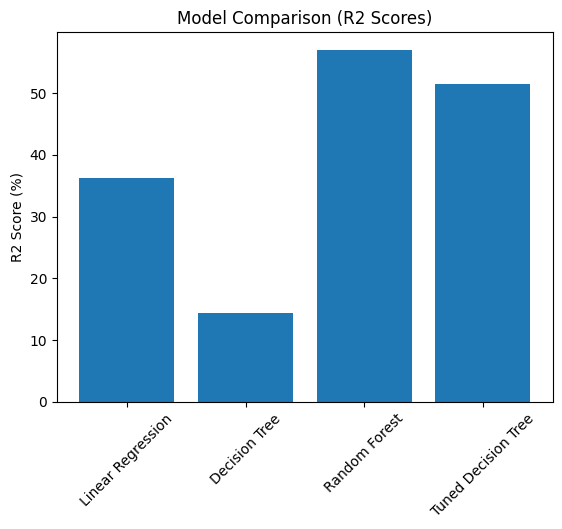

In [44]:
models = ["Linear Regression", "Decision Tree","Random Forest","Tuned Decision Tree"]
scores = [
    r2_score(y_test, lr_pred) * 100,
    r2_score(y_test, dt_pred) * 100,
    r2_score(y_test, rf_pred) * 100,
    r2_score(y_test, best_dt_pred) * 100
]
plt.bar(models, scores)
plt.title("Model Comparison (R2 Scores)")
plt.ylabel("R2 Score (%)")
plt.xticks(rotation=45)
plt.show()